In [1]:
import re,string
import csv
import string
import numpy as np
import preprocessor as p
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('data_final_revisi_tujuhribu_pre.csv', sep=';')
print(data)

                                                   text category
0     selamat kerja kabinet jokowi maruf kerja lurus...  positif
1     selamat nadiem anwar makarim menteri didik bud...  positif
2     pasca lantik kabinet indonesia maju jilid ii p...  negatif
3     visi misi menteri visi misi presiden wakil pre...  positif
4     tenang jokowi pilih menteri bukan asal yakin p...  positif
5      jadi hilang rasa kalo bukan buk sus jadi menteri  negatif
6                                 menteri rasa presiden  positif
7     banyak kejut sesuai harap selamat buat bapak p...  positif
8     masalah sama sekali bu ibu sukses bikin standa...  positif
9     ibu pilih jajar kabinet jokowi maruf sungguh s...  positif
10    wahai wakil rakyat menteri baru juang kaum mis...  positif
11        rakyat hibur segala bantuann presiden menteri  positif
12    edy prabowo jadi tri kkp mudah bukan politik d...  positif
13    selamat pak nadiem makarim jadi menteri didik ...  positif
14                       

In [4]:
data = data.copy()
data['category_id'] = data['category'].factorize()[0]+1
category_id = data[['category', 'category_id']].drop_duplicates().sort_values('category_id')
id_to_category = dict(category_id[['category_id', 'category']].values)
print(id_to_category)
#print(data)
data.groupby('category').size()

{1: 'positif', 2: 'negatif'}


category
negatif    2681
positif    4319
dtype: int64

In [5]:
# TFIDF Setting
tfidf = TfidfVectorizer(sublinear_tf=False, min_df=1, norm='l2', encoding='utf-8', ngram_range=(1, 1))

# TFIDF
features = tfidf.fit_transform(data['text'].values.astype('U')).toarray()
labels = data.category_id

# Print hasil TFIDF
# featuresName = tfidf.get_feature_names()
# indexTitle = [n for n in data['text']]
# rows, cols = features.nonzero()
    
# for row, col in zip(rows, cols):
#     print("Doc",row, "TFIDF", (featuresName[col], indexTitle[row]), features[row, col])
# print(features.shape)
# print(len(features))

KFold(n_splits=10, random_state=None, shuffle=False)
Fold  1
TRAIN : [ 700  701  702 ... 6997 6998 6999] 
TEST : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 21

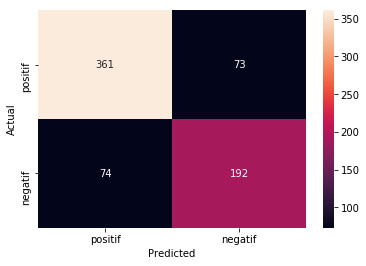

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.83      0.83      0.83       434
    negatif       0.72      0.72      0.72       266

avg / total       0.79      0.79      0.79       700

Akurasi Model 79.0 %
##########
Fold  2
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [ 700  701  702  703  704  705  706  707  708  709  710  711  712  713
  714  715  716  717  718  719  720  721  722  723  724  725  726  727
  728  729  730  731  732  733  734  735  736  737  738  739  740  741
  742  743  744  745  746  747  748  749  750  751  752  753  754  755
  756  757  758  759  760  761  762  763  764  765  766  767  768  769
  770  771  772  773  774  775  776  777  778  779  780  781  782  783
  784  785  786  787  788  789  790  791  792  793 

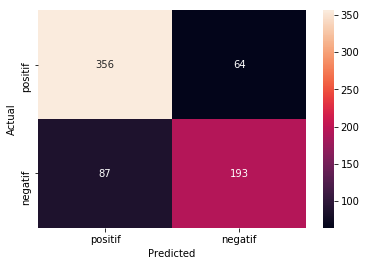

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.80      0.85      0.83       420
    negatif       0.75      0.69      0.72       280

avg / total       0.78      0.78      0.78       700

Akurasi Model 78.43 %
##########
Fold  3
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [1400 1401 1402 1403 1404 1405 1406 1407 1408 1409 1410 1411 1412 1413
 1414 1415 1416 1417 1418 1419 1420 1421 1422 1423 1424 1425 1426 1427
 1428 1429 1430 1431 1432 1433 1434 1435 1436 1437 1438 1439 1440 1441
 1442 1443 1444 1445 1446 1447 1448 1449 1450 1451 1452 1453 1454 1455
 1456 1457 1458 1459 1460 1461 1462 1463 1464 1465 1466 1467 1468 1469
 1470 1471 1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483
 1484 1485 1486 1487 1488 1489 1490 1491 1492 1493

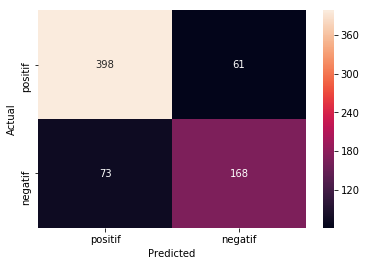

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.85      0.87      0.86       459
    negatif       0.73      0.70      0.71       241

avg / total       0.81      0.81      0.81       700

Akurasi Model 80.86 %
##########
Fold  4
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [2100 2101 2102 2103 2104 2105 2106 2107 2108 2109 2110 2111 2112 2113
 2114 2115 2116 2117 2118 2119 2120 2121 2122 2123 2124 2125 2126 2127
 2128 2129 2130 2131 2132 2133 2134 2135 2136 2137 2138 2139 2140 2141
 2142 2143 2144 2145 2146 2147 2148 2149 2150 2151 2152 2153 2154 2155
 2156 2157 2158 2159 2160 2161 2162 2163 2164 2165 2166 2167 2168 2169
 2170 2171 2172 2173 2174 2175 2176 2177 2178 2179 2180 2181 2182 2183
 2184 2185 2186 2187 2188 2189 2190 2191 2192 2193

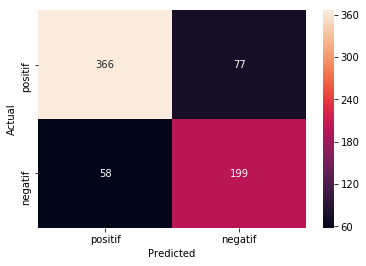

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.86      0.83      0.84       443
    negatif       0.72      0.77      0.75       257

avg / total       0.81      0.81      0.81       700

Akurasi Model 80.71 %
##########
Fold  5
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [2800 2801 2802 2803 2804 2805 2806 2807 2808 2809 2810 2811 2812 2813
 2814 2815 2816 2817 2818 2819 2820 2821 2822 2823 2824 2825 2826 2827
 2828 2829 2830 2831 2832 2833 2834 2835 2836 2837 2838 2839 2840 2841
 2842 2843 2844 2845 2846 2847 2848 2849 2850 2851 2852 2853 2854 2855
 2856 2857 2858 2859 2860 2861 2862 2863 2864 2865 2866 2867 2868 2869
 2870 2871 2872 2873 2874 2875 2876 2877 2878 2879 2880 2881 2882 2883
 2884 2885 2886 2887 2888 2889 2890 2891 2892 2893

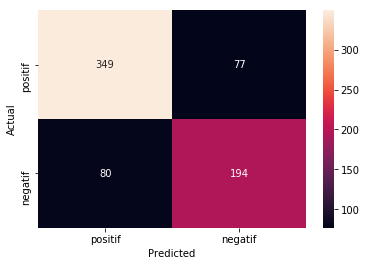

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.81      0.82      0.82       426
    negatif       0.72      0.71      0.71       274

avg / total       0.78      0.78      0.78       700

Akurasi Model 77.57 %
##########
Fold  6
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [3500 3501 3502 3503 3504 3505 3506 3507 3508 3509 3510 3511 3512 3513
 3514 3515 3516 3517 3518 3519 3520 3521 3522 3523 3524 3525 3526 3527
 3528 3529 3530 3531 3532 3533 3534 3535 3536 3537 3538 3539 3540 3541
 3542 3543 3544 3545 3546 3547 3548 3549 3550 3551 3552 3553 3554 3555
 3556 3557 3558 3559 3560 3561 3562 3563 3564 3565 3566 3567 3568 3569
 3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583
 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593

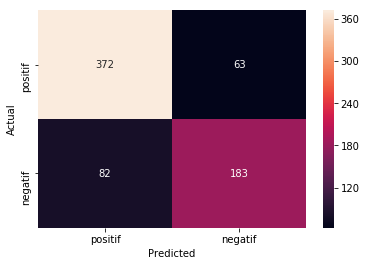

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.82      0.86      0.84       435
    negatif       0.74      0.69      0.72       265

avg / total       0.79      0.79      0.79       700

Akurasi Model 79.29 %
##########
Fold  7
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [4200 4201 4202 4203 4204 4205 4206 4207 4208 4209 4210 4211 4212 4213
 4214 4215 4216 4217 4218 4219 4220 4221 4222 4223 4224 4225 4226 4227
 4228 4229 4230 4231 4232 4233 4234 4235 4236 4237 4238 4239 4240 4241
 4242 4243 4244 4245 4246 4247 4248 4249 4250 4251 4252 4253 4254 4255
 4256 4257 4258 4259 4260 4261 4262 4263 4264 4265 4266 4267 4268 4269
 4270 4271 4272 4273 4274 4275 4276 4277 4278 4279 4280 4281 4282 4283
 4284 4285 4286 4287 4288 4289 4290 4291 4292 4293

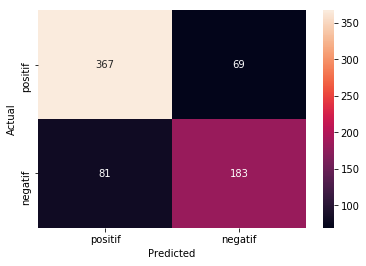

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.82      0.84      0.83       436
    negatif       0.73      0.69      0.71       264

avg / total       0.78      0.79      0.78       700

Akurasi Model 78.57 %
##########
Fold  8
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [4900 4901 4902 4903 4904 4905 4906 4907 4908 4909 4910 4911 4912 4913
 4914 4915 4916 4917 4918 4919 4920 4921 4922 4923 4924 4925 4926 4927
 4928 4929 4930 4931 4932 4933 4934 4935 4936 4937 4938 4939 4940 4941
 4942 4943 4944 4945 4946 4947 4948 4949 4950 4951 4952 4953 4954 4955
 4956 4957 4958 4959 4960 4961 4962 4963 4964 4965 4966 4967 4968 4969
 4970 4971 4972 4973 4974 4975 4976 4977 4978 4979 4980 4981 4982 4983
 4984 4985 4986 4987 4988 4989 4990 4991 4992 4993

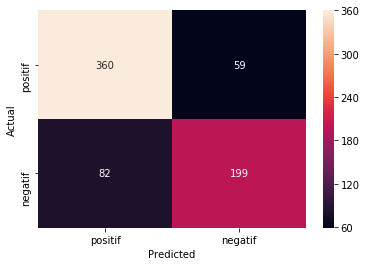

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.81      0.86      0.84       419
    negatif       0.77      0.71      0.74       281

avg / total       0.80      0.80      0.80       700

Akurasi Model 79.86 %
##########
Fold  9
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [5600 5601 5602 5603 5604 5605 5606 5607 5608 5609 5610 5611 5612 5613
 5614 5615 5616 5617 5618 5619 5620 5621 5622 5623 5624 5625 5626 5627
 5628 5629 5630 5631 5632 5633 5634 5635 5636 5637 5638 5639 5640 5641
 5642 5643 5644 5645 5646 5647 5648 5649 5650 5651 5652 5653 5654 5655
 5656 5657 5658 5659 5660 5661 5662 5663 5664 5665 5666 5667 5668 5669
 5670 5671 5672 5673 5674 5675 5676 5677 5678 5679 5680 5681 5682 5683
 5684 5685 5686 5687 5688 5689 5690 5691 5692 5693

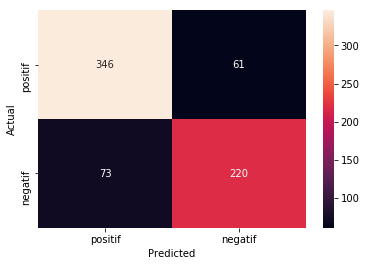

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.83      0.85      0.84       407
    negatif       0.78      0.75      0.77       293

avg / total       0.81      0.81      0.81       700

Akurasi Model 80.86 %
##########
Fold  10
TRAIN : [   0    1    2 ... 6297 6298 6299] 
TEST : [6300 6301 6302 6303 6304 6305 6306 6307 6308 6309 6310 6311 6312 6313
 6314 6315 6316 6317 6318 6319 6320 6321 6322 6323 6324 6325 6326 6327
 6328 6329 6330 6331 6332 6333 6334 6335 6336 6337 6338 6339 6340 6341
 6342 6343 6344 6345 6346 6347 6348 6349 6350 6351 6352 6353 6354 6355
 6356 6357 6358 6359 6360 6361 6362 6363 6364 6365 6366 6367 6368 6369
 6370 6371 6372 6373 6374 6375 6376 6377 6378 6379 6380 6381 6382 6383
 6384 6385 6386 6387 6388 6389 6390 6391 6392 639

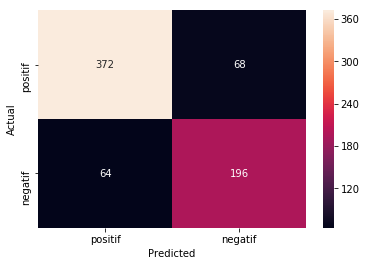

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.85      0.85      0.85       440
    negatif       0.74      0.75      0.75       260

avg / total       0.81      0.81      0.81       700

Akurasi Model 81.14 %
##########
shape x_train : (6300, 9328)
shape x_test : (700, 9328)


In [5]:
from sklearn.model_selection import KFold
import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer
# from multiscorer import MultiScorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, hamming_loss
from numpy import average

#svm = SVC(kernel='linear', C=5)
svm = KNeighborsClassifier(n_neighbors=5)

kf=KFold(n_splits=10, shuffle=False)
print(kf)  #buat tau Kfold dan parameter defaultnya
i=1        #ini gapenting, cuma buat nandain fold nya.
for train_index, test_index in kf.split(features):
    print("Fold ", i)
    print("TRAIN :", train_index,"\n" 
          "TEST :", test_index)
    x_train=features[train_index]
    x_test=features[test_index]
    y_train=labels[train_index]
    y_test=labels[test_index]
    i+=1
    
    
    svm.fit(x_train, y_train)
#     print (confusion_matrix(y_test, svm.predict(x_test)))
    
    y_true, y_pred = y_test, svm.predict(x_test)
    y_pred = svm.predict(x_test)
    
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id.category.values, yticklabels=category_id.category.values)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    ClfModel = svm.fit(features, labels)

    print('--------------Specification Model ! --------------\n', ClfModel)
    print(metrics.classification_report(y_true, y_pred, target_names=data['category'].unique()))
    print('Akurasi Model', round(metrics.accuracy_score(y_true, y_pred) * 100, 2), '%')
    print(10* '#')
    
print("shape x_train :", x_train.shape)
print("shape x_test :", x_test.shape)


KFold(n_splits=10, random_state=None, shuffle=False)
Fold  1
TRAIN : [ 700  701  702 ... 6997 6998 6999] 
TEST : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 21

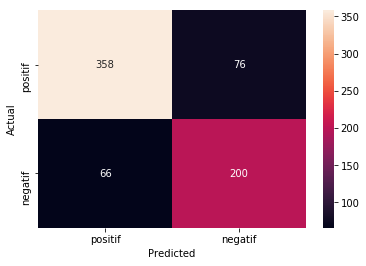

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.84      0.82      0.83       434
    negatif       0.72      0.75      0.74       266

avg / total       0.80      0.80      0.80       700

Akurasi Model 79.71 %
##########
Fold  2
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [ 700  701  702  703  704  705  706  707  708  709  710  711  712  713
  714  715  716  717  718  719  720  721  722  723  724  725  726  727
  728  729  730  731  732  733  734  735  736  737  738  739  740  741
  742  743  744  745  746  747  748  749  750  751  752  753  754  755
  756  757  758  759  760  761  762  763  764  765  766  767  768  769
  770  771  772  773  774  775  776  777  778  779  780  781  782  783
  784  785  786  787  788  789  790  791  792  793

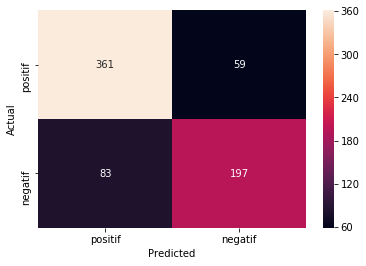

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.81      0.86      0.84       420
    negatif       0.77      0.70      0.74       280

avg / total       0.80      0.80      0.80       700

Akurasi Model 79.71 %
##########
Fold  3
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [1400 1401 1402 1403 1404 1405 1406 1407 1408 1409 1410 1411 1412 1413
 1414 1415 1416 1417 1418 1419 1420 1421 1422 1423 1424 1425 1426 1427
 1428 1429 1430 1431 1432 1433 1434 1435 1436 1437 1438 1439 1440 1441
 1442 1443 1444 1445 1446 1447 1448 1449 1450 1451 1452 1453 1454 1455
 1456 1457 1458 1459 1460 1461 1462 1463 1464 1465 1466 1467 1468 1469
 1470 1471 1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483
 1484 1485 1486 1487 1488 1489 1490 1491 1492 1493

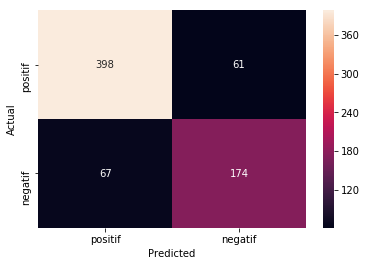

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.86      0.87      0.86       459
    negatif       0.74      0.72      0.73       241

avg / total       0.82      0.82      0.82       700

Akurasi Model 81.71 %
##########
Fold  4
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [2100 2101 2102 2103 2104 2105 2106 2107 2108 2109 2110 2111 2112 2113
 2114 2115 2116 2117 2118 2119 2120 2121 2122 2123 2124 2125 2126 2127
 2128 2129 2130 2131 2132 2133 2134 2135 2136 2137 2138 2139 2140 2141
 2142 2143 2144 2145 2146 2147 2148 2149 2150 2151 2152 2153 2154 2155
 2156 2157 2158 2159 2160 2161 2162 2163 2164 2165 2166 2167 2168 2169
 2170 2171 2172 2173 2174 2175 2176 2177 2178 2179 2180 2181 2182 2183
 2184 2185 2186 2187 2188 2189 2190 2191 2192 2193

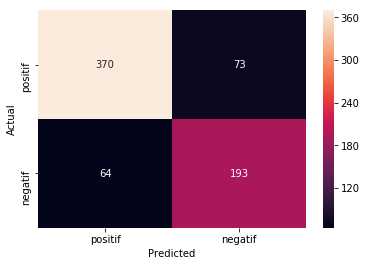

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.85      0.84      0.84       443
    negatif       0.73      0.75      0.74       257

avg / total       0.81      0.80      0.80       700

Akurasi Model 80.43 %
##########
Fold  5
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [2800 2801 2802 2803 2804 2805 2806 2807 2808 2809 2810 2811 2812 2813
 2814 2815 2816 2817 2818 2819 2820 2821 2822 2823 2824 2825 2826 2827
 2828 2829 2830 2831 2832 2833 2834 2835 2836 2837 2838 2839 2840 2841
 2842 2843 2844 2845 2846 2847 2848 2849 2850 2851 2852 2853 2854 2855
 2856 2857 2858 2859 2860 2861 2862 2863 2864 2865 2866 2867 2868 2869
 2870 2871 2872 2873 2874 2875 2876 2877 2878 2879 2880 2881 2882 2883
 2884 2885 2886 2887 2888 2889 2890 2891 2892 2893

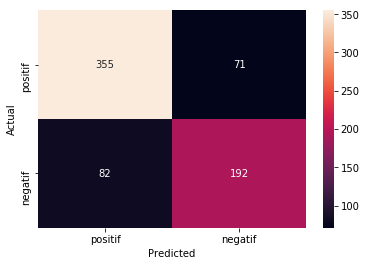

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.81      0.83      0.82       426
    negatif       0.73      0.70      0.72       274

avg / total       0.78      0.78      0.78       700

Akurasi Model 78.14 %
##########
Fold  6
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [3500 3501 3502 3503 3504 3505 3506 3507 3508 3509 3510 3511 3512 3513
 3514 3515 3516 3517 3518 3519 3520 3521 3522 3523 3524 3525 3526 3527
 3528 3529 3530 3531 3532 3533 3534 3535 3536 3537 3538 3539 3540 3541
 3542 3543 3544 3545 3546 3547 3548 3549 3550 3551 3552 3553 3554 3555
 3556 3557 3558 3559 3560 3561 3562 3563 3564 3565 3566 3567 3568 3569
 3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583
 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593

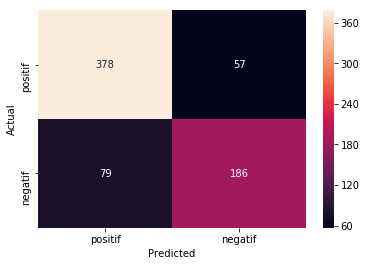

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.83      0.87      0.85       435
    negatif       0.77      0.70      0.73       265

avg / total       0.80      0.81      0.80       700

Akurasi Model 80.57 %
##########
Fold  7
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [4200 4201 4202 4203 4204 4205 4206 4207 4208 4209 4210 4211 4212 4213
 4214 4215 4216 4217 4218 4219 4220 4221 4222 4223 4224 4225 4226 4227
 4228 4229 4230 4231 4232 4233 4234 4235 4236 4237 4238 4239 4240 4241
 4242 4243 4244 4245 4246 4247 4248 4249 4250 4251 4252 4253 4254 4255
 4256 4257 4258 4259 4260 4261 4262 4263 4264 4265 4266 4267 4268 4269
 4270 4271 4272 4273 4274 4275 4276 4277 4278 4279 4280 4281 4282 4283
 4284 4285 4286 4287 4288 4289 4290 4291 4292 4293

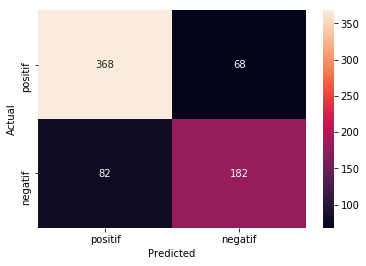

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.82      0.84      0.83       436
    negatif       0.73      0.69      0.71       264

avg / total       0.78      0.79      0.78       700

Akurasi Model 78.57 %
##########
Fold  8
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [4900 4901 4902 4903 4904 4905 4906 4907 4908 4909 4910 4911 4912 4913
 4914 4915 4916 4917 4918 4919 4920 4921 4922 4923 4924 4925 4926 4927
 4928 4929 4930 4931 4932 4933 4934 4935 4936 4937 4938 4939 4940 4941
 4942 4943 4944 4945 4946 4947 4948 4949 4950 4951 4952 4953 4954 4955
 4956 4957 4958 4959 4960 4961 4962 4963 4964 4965 4966 4967 4968 4969
 4970 4971 4972 4973 4974 4975 4976 4977 4978 4979 4980 4981 4982 4983
 4984 4985 4986 4987 4988 4989 4990 4991 4992 4993

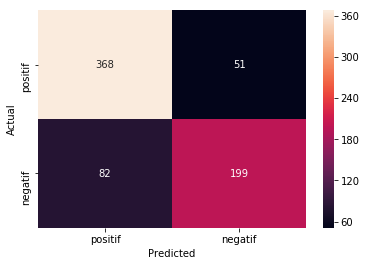

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.82      0.88      0.85       419
    negatif       0.80      0.71      0.75       281

avg / total       0.81      0.81      0.81       700

Akurasi Model 81.0 %
##########
Fold  9
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [5600 5601 5602 5603 5604 5605 5606 5607 5608 5609 5610 5611 5612 5613
 5614 5615 5616 5617 5618 5619 5620 5621 5622 5623 5624 5625 5626 5627
 5628 5629 5630 5631 5632 5633 5634 5635 5636 5637 5638 5639 5640 5641
 5642 5643 5644 5645 5646 5647 5648 5649 5650 5651 5652 5653 5654 5655
 5656 5657 5658 5659 5660 5661 5662 5663 5664 5665 5666 5667 5668 5669
 5670 5671 5672 5673 5674 5675 5676 5677 5678 5679 5680 5681 5682 5683
 5684 5685 5686 5687 5688 5689 5690 5691 5692 5693 

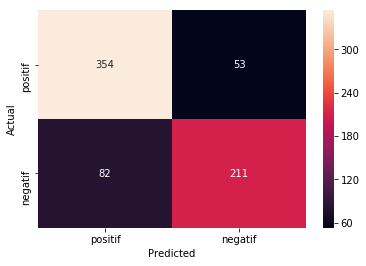

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.81      0.87      0.84       407
    negatif       0.80      0.72      0.76       293

avg / total       0.81      0.81      0.81       700

Akurasi Model 80.71 %
##########
Fold  10
TRAIN : [   0    1    2 ... 6297 6298 6299] 
TEST : [6300 6301 6302 6303 6304 6305 6306 6307 6308 6309 6310 6311 6312 6313
 6314 6315 6316 6317 6318 6319 6320 6321 6322 6323 6324 6325 6326 6327
 6328 6329 6330 6331 6332 6333 6334 6335 6336 6337 6338 6339 6340 6341
 6342 6343 6344 6345 6346 6347 6348 6349 6350 6351 6352 6353 6354 6355
 6356 6357 6358 6359 6360 6361 6362 6363 6364 6365 6366 6367 6368 6369
 6370 6371 6372 6373 6374 6375 6376 6377 6378 6379 6380 6381 6382 6383
 6384 6385 6386 6387 6388 6389 6390 6391 6392 639

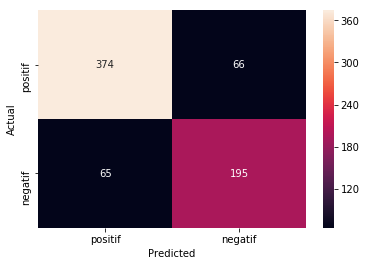

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.85      0.85      0.85       440
    negatif       0.75      0.75      0.75       260

avg / total       0.81      0.81      0.81       700

Akurasi Model 81.29 %
##########
shape x_train : (6300, 9328)
shape x_test : (700, 9328)


In [6]:
from sklearn.model_selection import KFold
import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer
# from multiscorer import MultiScorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, hamming_loss
from numpy import average

#svm = SVC(kernel='linear', C=5)
svm = KNeighborsClassifier(n_neighbors=7)

kf=KFold(n_splits=10, shuffle=False)
print(kf)  #buat tau Kfold dan parameter defaultnya
i=1        #ini gapenting, cuma buat nandain fold nya.
for train_index, test_index in kf.split(features):
    print("Fold ", i)
    print("TRAIN :", train_index,"\n" 
          "TEST :", test_index)
    x_train=features[train_index]
    x_test=features[test_index]
    y_train=labels[train_index]
    y_test=labels[test_index]
    i+=1
    
    
    svm.fit(x_train, y_train)
#     print (confusion_matrix(y_test, svm.predict(x_test)))
    
    y_true, y_pred = y_test, svm.predict(x_test)
    y_pred = svm.predict(x_test)
    
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id.category.values, yticklabels=category_id.category.values)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    ClfModel = svm.fit(features, labels)

    print('--------------Specification Model ! --------------\n', ClfModel)
    print(metrics.classification_report(y_true, y_pred, target_names=data['category'].unique()))
    print('Akurasi Model', round(metrics.accuracy_score(y_true, y_pred) * 100, 2), '%')
    print(10* '#')
    
print("shape x_train :", x_train.shape)
print("shape x_test :", x_test.shape)


KFold(n_splits=10, random_state=None, shuffle=False)
Fold  1
TRAIN : [ 700  701  702 ... 6997 6998 6999] 
TEST : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 21

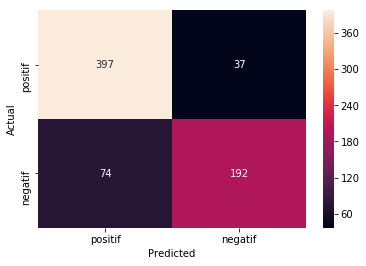

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.84      0.91      0.88       434
    negatif       0.84      0.72      0.78       266

avg / total       0.84      0.84      0.84       700

Akurasi Model 84.14 %
##########
Fold  2
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [ 700  701  702  703  704  705  706  707  708  709  710  711  712  713
  714  715  716  717  718  719  720  721  722  723  724  725  726  727
  728  729  730  731  732  733  734  735  736  737  738  739  740  741
  742  

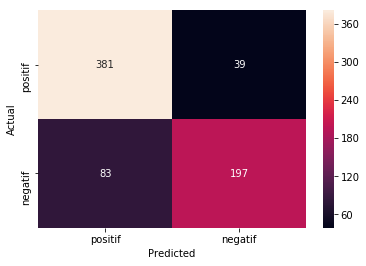

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.82      0.91      0.86       420
    negatif       0.83      0.70      0.76       280

avg / total       0.83      0.83      0.82       700

Akurasi Model 82.57 %
##########
Fold  3
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [1400 1401 1402 1403 1404 1405 1406 1407 1408 1409 1410 1411 1412 1413
 1414 1415 1416 1417 1418 1419 1420 1421 1422 1423 1424 1425 1426 1427
 1428 1429 1430 1431 1432 1433 1434 1435 1436 1437 1438 1439 1440 1441
 1442 1

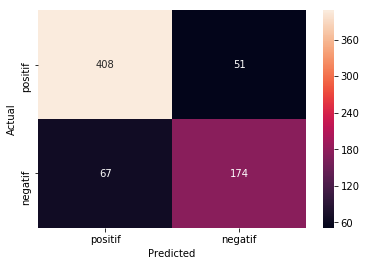

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.86      0.89      0.87       459
    negatif       0.77      0.72      0.75       241

avg / total       0.83      0.83      0.83       700

Akurasi Model 83.14 %
##########
Fold  4
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [2100 2101 2102 2103 2104 2105 2106 2107 2108 2109 2110 2111 2112 2113
 2114 2115 2116 2117 2118 2119 2120 2121 2122 2123 2124 2125 2126 2127
 2128 2129 2130 2131 2132 2133 2134 2135 2136 2137 2138 2139 2140 2141
 2142 2

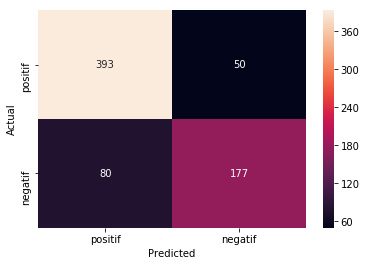

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.83      0.89      0.86       443
    negatif       0.78      0.69      0.73       257

avg / total       0.81      0.81      0.81       700

Akurasi Model 81.43 %
##########
Fold  5
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [2800 2801 2802 2803 2804 2805 2806 2807 2808 2809 2810 2811 2812 2813
 2814 2815 2816 2817 2818 2819 2820 2821 2822 2823 2824 2825 2826 2827
 2828 2829 2830 2831 2832 2833 2834 2835 2836 2837 2838 2839 2840 2841
 2842 2

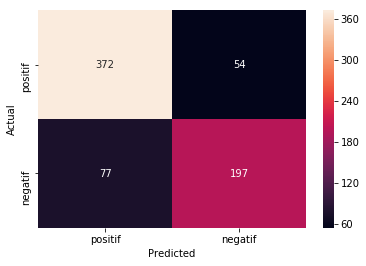

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.83      0.87      0.85       426
    negatif       0.78      0.72      0.75       274

avg / total       0.81      0.81      0.81       700

Akurasi Model 81.29 %
##########
Fold  6
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [3500 3501 3502 3503 3504 3505 3506 3507 3508 3509 3510 3511 3512 3513
 3514 3515 3516 3517 3518 3519 3520 3521 3522 3523 3524 3525 3526 3527
 3528 3529 3530 3531 3532 3533 3534 3535 3536 3537 3538 3539 3540 3541
 3542 3

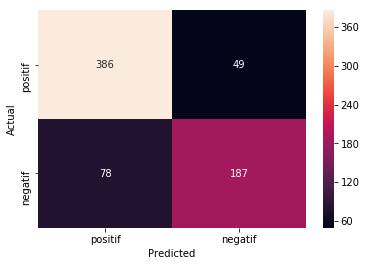

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.83      0.89      0.86       435
    negatif       0.79      0.71      0.75       265

avg / total       0.82      0.82      0.82       700

Akurasi Model 81.86 %
##########
Fold  7
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [4200 4201 4202 4203 4204 4205 4206 4207 4208 4209 4210 4211 4212 4213
 4214 4215 4216 4217 4218 4219 4220 4221 4222 4223 4224 4225 4226 4227
 4228 4229 4230 4231 4232 4233 4234 4235 4236 4237 4238 4239 4240 4241
 4242 4

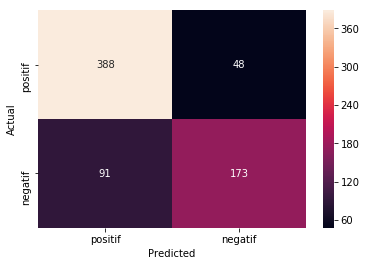

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.81      0.89      0.85       436
    negatif       0.78      0.66      0.71       264

avg / total       0.80      0.80      0.80       700

Akurasi Model 80.14 %
##########
Fold  8
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [4900 4901 4902 4903 4904 4905 4906 4907 4908 4909 4910 4911 4912 4913
 4914 4915 4916 4917 4918 4919 4920 4921 4922 4923 4924 4925 4926 4927
 4928 4929 4930 4931 4932 4933 4934 4935 4936 4937 4938 4939 4940 4941
 4942 4

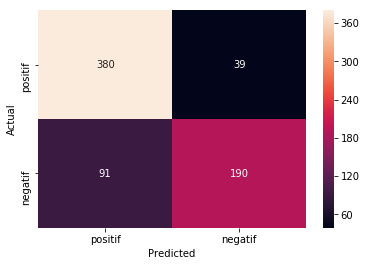

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.81      0.91      0.85       419
    negatif       0.83      0.68      0.75       281

avg / total       0.82      0.81      0.81       700

Akurasi Model 81.43 %
##########
Fold  9
TRAIN : [   0    1    2 ... 6997 6998 6999] 
TEST : [5600 5601 5602 5603 5604 5605 5606 5607 5608 5609 5610 5611 5612 5613
 5614 5615 5616 5617 5618 5619 5620 5621 5622 5623 5624 5625 5626 5627
 5628 5629 5630 5631 5632 5633 5634 5635 5636 5637 5638 5639 5640 5641
 5642 5

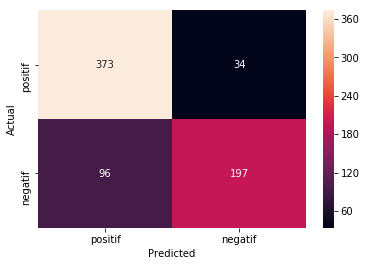

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.80      0.92      0.85       407
    negatif       0.85      0.67      0.75       293

avg / total       0.82      0.81      0.81       700

Akurasi Model 81.43 %
##########
Fold  10
TRAIN : [   0    1    2 ... 6297 6298 6299] 
TEST : [6300 6301 6302 6303 6304 6305 6306 6307 6308 6309 6310 6311 6312 6313
 6314 6315 6316 6317 6318 6319 6320 6321 6322 6323 6324 6325 6326 6327
 6328 6329 6330 6331 6332 6333 6334 6335 6336 6337 6338 6339 6340 6341
 6342 

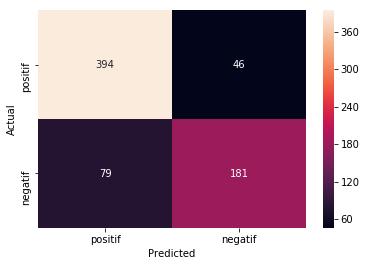

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.83      0.90      0.86       440
    negatif       0.80      0.70      0.74       260

avg / total       0.82      0.82      0.82       700

Akurasi Model 82.14 %
##########
shape x_train : (6300, 9328)
shape x_test : (700, 9328)


In [6]:
from sklearn.model_selection import KFold
import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer
# from multiscorer import MultiScorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, hamming_loss
from numpy import average
from sklearn.ensemble import RandomForestClassifier

#svm = SVC(kernel='linear', C=5)
#svm = KNeighborsClassifier(n_neighbors=7)
clf_rf = RandomForestClassifier(max_depth=50, n_estimators=100)

kf=KFold(n_splits=10, shuffle=False)
print(kf)  #buat tau Kfold dan parameter defaultnya
i=1        #ini gapenting, cuma buat nandain fold nya.
for train_index, test_index in kf.split(features):
    print("Fold ", i)
    print("TRAIN :", train_index,"\n" 
          "TEST :", test_index)
    x_train=features[train_index]
    x_test=features[test_index]
    y_train=labels[train_index]
    y_test=labels[test_index]
    i+=1
    
    
    clf_rf.fit(x_train, y_train)
#     print (confusion_matrix(y_test, svm.predict(x_test)))
    
    y_true, y_pred = y_test, clf_rf.predict(x_test)
    y_pred = clf_rf.predict(x_test)
    
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id.category.values, yticklabels=category_id.category.values)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    ClfModel = clf_rf.fit(features, labels)

    print('--------------Specification Model ! --------------\n', ClfModel)
    print(metrics.classification_report(y_true, y_pred, target_names=data['category'].unique()))
    print('Akurasi Model', round(metrics.accuracy_score(y_true, y_pred) * 100, 2), '%')
    print(10* '#')
    
print("shape x_train :", x_train.shape)
print("shape x_test :", x_test.shape)


In [ ]:
# klasifikasi 5-NN

# Tranning
#Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, labels, test_size=0.2, random_state=5, shuffle=True)
Model = KNeighborsClassifier(n_neighbors=5)
# Model = LinearSVC(C=0.9)
Model.fit(Xtrain, Ytrain)
y_true, y_pred = Ytest, Model.predict(Xtest)
Ypred = Model.predict(Xtest)

# Confusion Matrix
conf_mat = confusion_matrix(Ytest, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id.category.values, yticklabels=category_id.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
ClfModel = Model.fit(features, labels)

print('--------------Specification Model ! --------------\n', ClfModel)
print(metrics.classification_report(y_true, y_pred, target_names=data['category'].unique()))
print('Akurasi Model', round(metrics.accuracy_score(y_true, y_pred) * 100, 2), '%')

# print(Xtrain.shape)
# print(Ytrain.shape)

print ("Komponen training set = {}" .format(Counter(Ytrain)))
print ("Komponen testing set = {}" .format(Counter(Ytest)))

In [ ]:
#klasifikasi 7-NN

#Model = KNeighborsClassifier(n_neighbors=7)
# Model = LinearSVC(C=0.9)
Model.fit(Xtrain, Ytrain)
y_true, y_pred = Ytest, Model.predict(Xtest)
Ypred = Model.predict(Xtest)


# Confusion Matrix
conf_mat = confusion_matrix(Ytest, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id.category.values, yticklabels=category_id.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
ClfModel = Model.fit(features, labels)

print('--------------Specification Model ! --------------\n', ClfModel)
print(metrics.classification_report(y_true, y_pred, target_names=data['category'].unique()))
print('Akurasi Model', round(metrics.accuracy_score(y_true, y_pred) * 100, 2), '%')

# print(Xtrain.shape)
# print(Ytrain.shape)

print ("Komponen training set = {}" .format(Counter(Ytrain)))
print ("Komponen testing set = {}" .format(Counter(Ytest)))

In [ ]:
#training random forest

#from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state=5, shuffle=True)


# clf_dt = DecisionTreeClassifier(max_depth=5, criterion='entropy')
# clf_dt.fit(X_train, y_train)

clf_rf = RandomForestClassifier(max_depth=50, n_estimators=100, max_features='auto')
clf_rf.fit(X_train, y_train)



print (X_train.shape)
print (X_test.shape)

print ("Komponen training set = {}" .format(Counter(y_train)))
print ("Komponen testing set = {}" .format(Counter(y_test)))


In [ ]:
#cetak tree ke N

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from subprocess import check_call
import pydotplus

estimator = clf_rf.estimators_[15]

#dot_data = StringIO()
export_graphviz (estimator, out_file='hasil.dot',
                  class_names=category_id.category.values,
                rounded=True, proportion=False, precision=2, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'bisa.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

In [ ]:
#testing random forest

#y_pred = clf_dt.predict(X_test)

y_pred = clf_rf.predict(X_test)


# Confusion Matrix
#conf_matr = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matr, annot=True, fmt='d', xticklabels=category_id.category.values, yticklabels=category_id.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


print(classification_report(y_test, y_pred))
print('Akurasi Model', round(metrics.accuracy_score(y_test, y_pred) * 100, 2), '%')
